In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/05.%20Week%205/netflix_titles/netflix_titles.csv"
df = pd.read_csv(url)
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [5]:
df['country'] = df['country'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")
df['date_added'] = df['date_added'].fillna("Unknown")
df['duration'] = df['duration'].fillna("Unknown")

df['date_added'] = df['date_added'].astype(str)
df['year_added'] = df['date_added'].apply(lambda x: x.strip().split()[-1] if x != 'Unknown' else 'Unknown')
df['month_added'] = df['date_added'].apply(lambda x: x.strip().split()[0] if x != 'Unknown' else 'Unknown')

df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])

<ipython-input-6-4f8be07dfb43>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


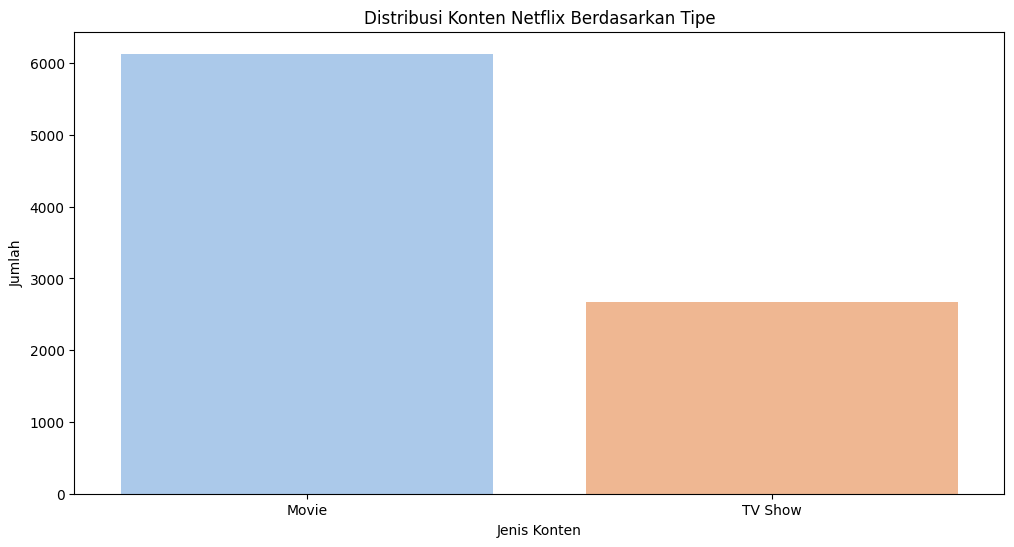

In [6]:
plt.rcParams['figure.figsize'] = (12, 6)

sns.countplot(x='type', data=df, palette='pastel')
plt.title('Distribusi Konten Netflix Berdasarkan Tipe')
plt.xlabel('Jenis Konten')
plt.ylabel('Jumlah')
plt.show()

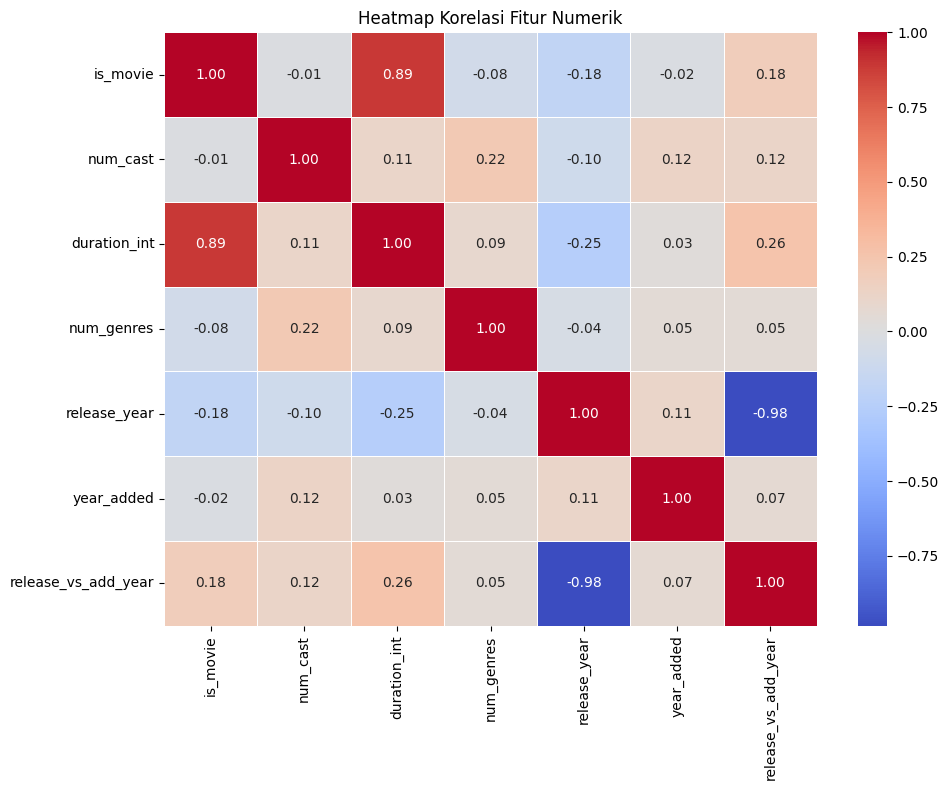

In [12]:
numerical_features = ['is_movie', 'num_cast', 'duration_int', 'num_genres', 'release_year', 'year_added', 'release_vs_add_year']
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

<ipython-input-13-202402217492>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='duration_type', y='duration_int', palette='Set3')


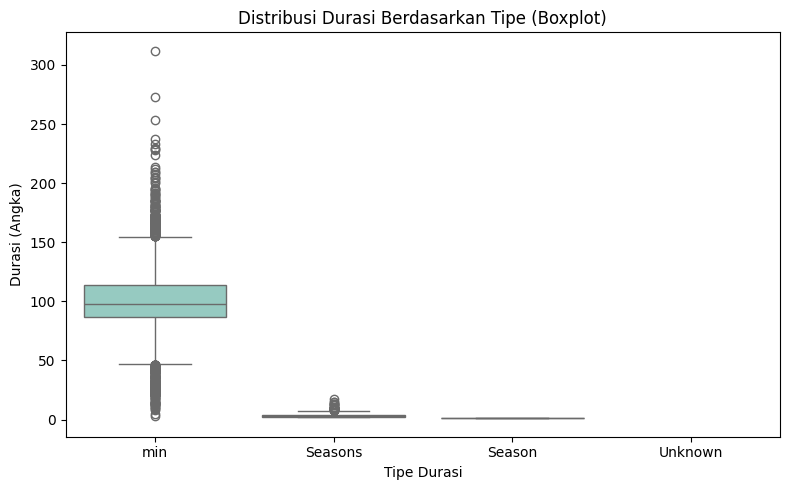

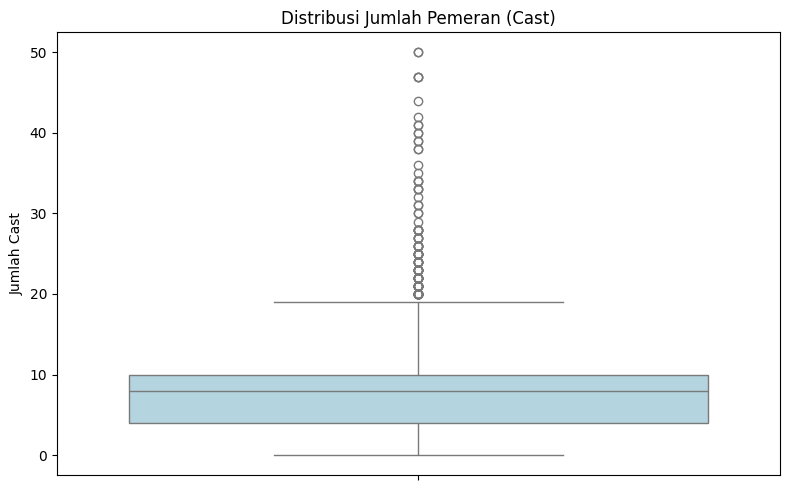

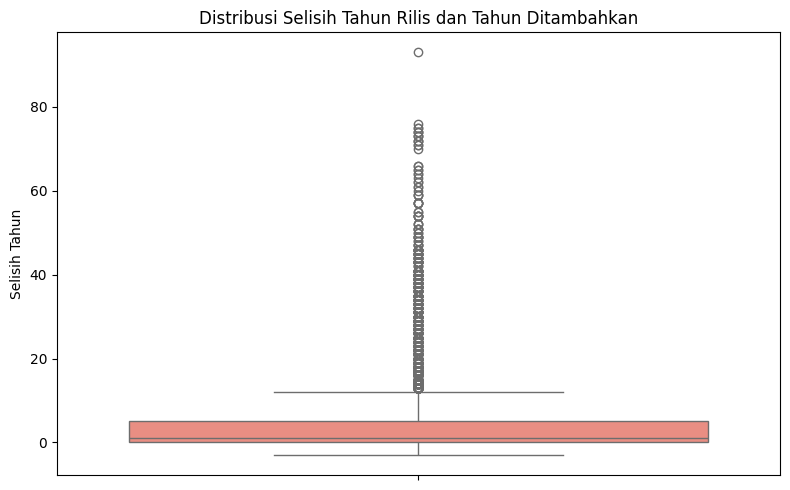

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='duration_type', y='duration_int', palette='Set3')
plt.title('Distribusi Durasi Berdasarkan Tipe (Boxplot)')
plt.xlabel('Tipe Durasi')
plt.ylabel('Durasi (Angka)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['num_cast'], color='lightblue')
plt.title('Distribusi Jumlah Pemeran (Cast)')
plt.ylabel('Jumlah Cast')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['release_vs_add_year'], color='salmon')
plt.title('Distribusi Selisih Tahun Rilis dan Tahun Ditambahkan')
plt.ylabel('Selisih Tahun')
plt.tight_layout()
plt.show()

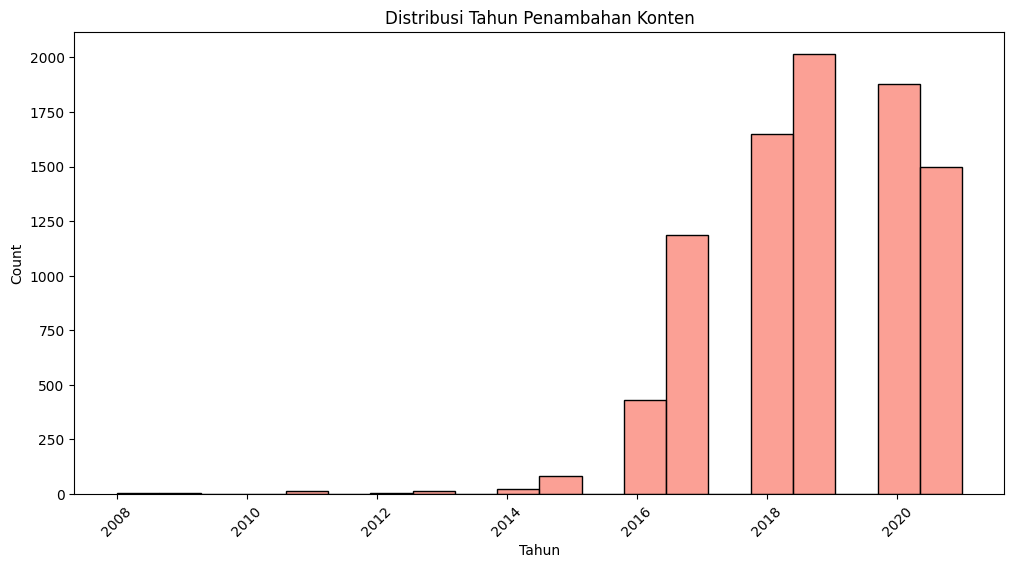

<ipython-input-16-eaaa25115fea>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rating_count.index, y=top_rating_count.values, palette='viridis')


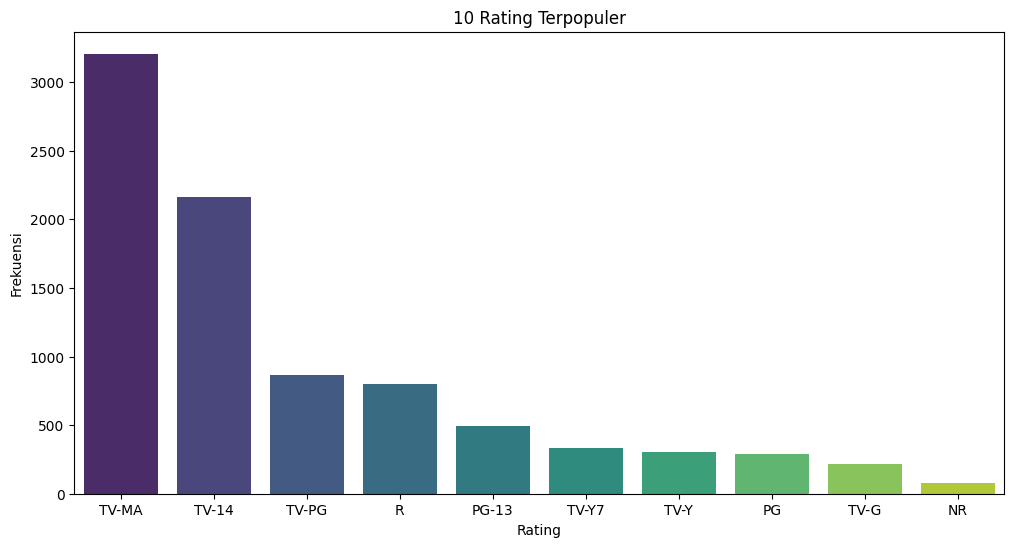

<ipython-input-16-eaaa25115fea>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_country.index, y=top_country.values, palette='plasma')


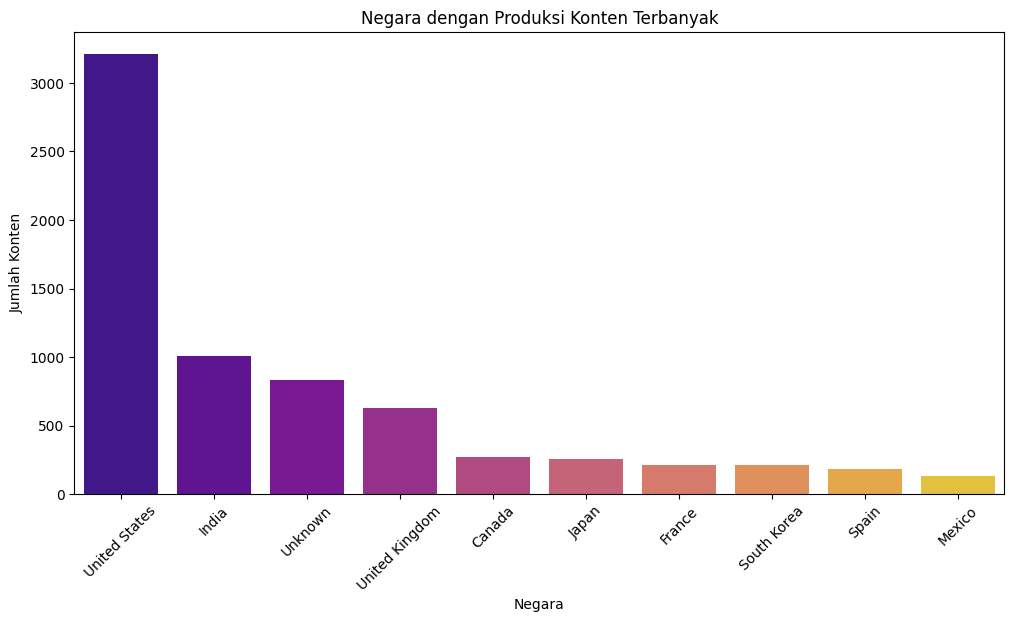

In [16]:
sns.histplot(data=df[df['year_added'] != 'Unknown'], x='year_added', bins=20, color='salmon')
plt.title('Distribusi Tahun Penambahan Konten')
plt.xlabel('Tahun')
plt.xticks(rotation=45)
plt.show()

top_rating_count = df['rating'].value_counts().nlargest(10)
sns.barplot(x=top_rating_count.index, y=top_rating_count.values, palette='viridis')
plt.title('10 Rating Terpopuler')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

top_country = df['main_country'].value_counts().nlargest(10)
sns.barplot(x=top_country.index, y=top_country.values, palette='plasma')
plt.title('Negara dengan Produksi Konten Terbanyak')
plt.xlabel('Negara')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.show()

In [17]:
df['is_movie'] = df['type'].map(lambda x: 1 if x == 'Movie' else 0)
df['num_cast'] = df['cast'].map(lambda x: len(x.split(',')) if x != 'Unknown' else 0)
df['duration_int'] = df['duration'].str.extract('(\d+)').astype('float')
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')
df['release_vs_add_year'] = df['year_added'] - df['release_year']

df[['title', 'type', 'is_movie', 'num_cast', 'duration_int', 'duration_type', 'num_genres', 'release_vs_add_year']].head()

,title,type,is_movie,num_cast,duration_int,duration_type,num_genres,release_vs_add_year
0,Dick Johnson Is Dead,Movie,1,0,90.0,min,1,1.0
1,Blood & Water,TV Show,0,19,2.0,Seasons,3,0.0
2,Ganglands,TV Show,0,9,1.0,Season,3,0.0
3,Jailbirds New Orleans,TV Show,0,0,1.0,Season,2,0.0
4,Kota Factory,TV Show,0,8,2.0,Seasons,3,0.0


# **1. Ekstraksi duration_int dari string duration**

df['duration_int'] = df['duration'].str.extract('(\d+)').astype('float')

Penjelasan:

Ekspresi Reguler (\d+) digunakan untuk mengekstrak angka dari string.
Contoh:

*   "90 min" -> 90
*  "2 Seasons" -> 2

Persamaan secara matematis:

Jika x adalah string "90 min", maka duration_int = extract_number(x) = 90


# **2. Kolom biner is_movie**

df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

Penjelasan:

Ini adalah transformasi logika boolean ke angka:

is_movie = 1, jika type == 'Movie'

is_movie = 0, jika type != 'Movie'

Sama seperti fungsi:

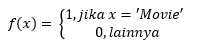


# **3. Hitung jumlah pemeran (num_cast)**

df['num_cast'] = df['cast'].apply(lambda x: len(x.split(',')) if x != 'Unknown' else 0)


Penjelasan:

Menggunakan fungsi split(',') untuk memisahkan nama aktor, lalu menghitung banyaknya.

Secara matematis:

num_cast=jumlah elemen dalam string cast yang dipisah koma


# **4. Hitung jumlah genre (num_genres)**

df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))

Penjelasan:

Sama seperti num_cast, ini menghitung berapa genre ada per konten.

num_genres=jumlah elemen dalam listed_in yang dipisah koma


# **5. Selisih tahun penambahan dan rilis (release_vs_add_year)**

df['release_vs_add_year'] = df['year_added'] - df['release_year']

Penjelasan:
Ini adalah operasi matematika dasar:

release_vs_add_year = year_added - release_year

Contoh:


*   Tahun ditambahkan: 2020
*   Tahun rilis: 2016
*   Maka selisihnya: 4 tahun

Artinya butuh waktu 4 tahun sejak rilis untuk konten itu masuk ke Netflix.


# **6. Korelasi antar fitur (Heatmap)**

df[numerical_features].corr()

Penjelasan:

Fungsi .corr() menghitung Pearson correlation coefficient antar fitur numerik, yaitu:

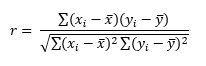

Nilainya antara -1 (berkorelasi negatif sempurna) sampai +1 (berkorelasi positif sempurna).


